In [1]:
import random
import torch

In [2]:
import d2l
from d2l import torch as d2l

In [11]:
hg_wells = d2l.read_time_machine()

In [13]:
hg_wells[34:39]

['that is all right said the psychologist',
 '',
 'nor having only length breadth and thickness can a cube have a',
 'real existence',
 '']

In [19]:
def tokenize(lines, type='word'):
    if type=='word':
        return [line.split() for line in lines]
    elif type=='char':
        return [list(line) for line in lines]
    else:
        return 'unknown type of token. Check definition.'

In [20]:
tokens = tokenize(hg_wells)


In [26]:
tokens[15:17][:3]

[['luxurious',
  'after',
  'dinner',
  'atmosphere',
  'when',
  'thought',
  'roams',
  'gracefully'],
 ['free',
  'of',
  'the',
  'trammels',
  'of',
  'precision',
  'and',
  'he',
  'put',
  'it',
  'to',
  'us',
  'in',
  'this']]

In [25]:
char_tokens = tokenize(hg_wells, type='char')

char_tokens[15][:5]

['l', 'u', 'x', 'u', 'r']

In [27]:
corpus  = [token for line in tokens for token in line]

In [28]:
corpus[:5]

['the', 'time', 'machine', 'by', 'h']

In [34]:
import collections

def count_corpus(tokens):
    if len(tokens)==0 or isinstance(tokens[0], list):
        tokens = [token for line in tokens for token in line]
    return collections.Counter(tokens)

In [32]:
class Vocab:
    def __init__(self,tokens=None, min_freq=0,reserved_tokens=None):
        if tokens is None:
            tokens = []
        if reserved_tokens is None:
            reserved_tokens = []
        
        self.counter = count_corpus(tokens)
        
    
    def __len__():
        pass
    
    def __getitem__(index):
        pass

In [36]:
vocab = Vocab(tokens)

vocab.counter

Counter({'the': 2261,
         'time': 200,
         'machine': 85,
         'by': 103,
         'h': 1,
         'g': 1,
         'wells': 9,
         'i': 1267,
         'traveller': 61,
         'for': 221,
         'so': 112,
         'it': 437,
         'will': 37,
         'be': 93,
         'convenient': 5,
         'to': 695,
         'speak': 6,
         'of': 1155,
         'him': 40,
         'was': 552,
         'expounding': 2,
         'a': 816,
         'recondite': 1,
         'matter': 6,
         'us': 35,
         'his': 129,
         'grey': 11,
         'eyes': 35,
         'shone': 8,
         'and': 1245,
         'twinkled': 1,
         'usually': 3,
         'pale': 10,
         'face': 38,
         'flushed': 2,
         'animated': 3,
         'fire': 30,
         'burned': 6,
         'brightly': 4,
         'soft': 16,
         'radiance': 1,
         'incandescent': 1,
         'lights': 1,
         'in': 541,
         'lilies': 1,
         'silver': 6,
  

In [5]:
vocab = d2l.Vocab(corpus)

In [6]:
vocab.token_freqs[:10]

[('the', 2261),
 ('i', 1267),
 ('and', 1245),
 ('of', 1155),
 ('a', 816),
 ('to', 695),
 ('was', 552),
 ('in', 541),
 ('that', 443),
 ('my', 440)]

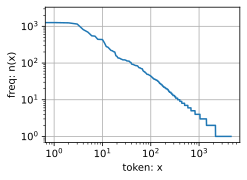

In [7]:
freqs = [freq for token, freq in vocab.token_freqs]
d2l.plot(freqs, xlabel='token: x', ylabel='freq: n(x)', xscale='log', yscale='log')